In [ ]:
import cv2
import numpy as np
import pandas as pd
import os
from random import shuffle
from tqdm import tqdm
import matplotlib.pyplot as plt

In [ ]:
os.getcwd()

'/home/jovyan/work'

In [ ]:
GOTHIC_DIR = '../../../tmp/training_images/gothic'
ROMANESQUE_DIR = '/./../../tmp/training_images/romanesque'

IMG_SIZE = 50
LR = 1e-3

MODEL_NAME = 'gothicvsromanesque-{}-{}.model'.format(LR, '2conv-basic')

In [ ]:
# def label_img(name):
#     word_label = name.split('-')[0]
#     if word_label == 'gothic': return np.array([1, 0])
#     elif word_label == 'romanesque' : return np.array([0, 1])

In [ ]:
def create_gothic():
    gothic_data = []
    for img in tqdm(os.listdir(GOTHIC_DIR)):
        label = np.array([1, 0])
        path = os.path.join(GOTHIC_DIR, img)
        img = cv2.resize(cv2.imread(path, cv2.IMREAD_GRAYSCALE), (IMG_SIZE, IMG_SIZE))
        gothic_data.append([np.array(img), label])
    shuffle(gothic_data)
    np.save('gothic_data.npy', gothic_data)
    return gothic_data
    
    
def create_roman():
    roman_data = []
    for img in tqdm(os.listdir(ROMANESQUE_DIR)):
        label = np.array([0, 1])
        path = os.path.join(ROMANESQUE_DIR, img)
        img = cv2.resize(cv2.imread(path, cv2.IMREAD_GRAYSCALE), (IMG_SIZE, IMG_SIZE))
        roman_data.append([np.array(img), label])
    shuffle(roman_data)
    np.save('roman_data.npy', roman_data)
    return roman_data

In [ ]:
gothic_data = create_gothic()
roman_data = create_roman()

100%|██████████| 162/162 [00:02<00:00, 60.93it/s]
/opt/conda/lib/python3.8/site-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  
100%|██████████| 290/290 [00:02<00:00, 116.62it/s]


In [ ]:
def create_train_data():
    training_data = []

    for img in gothic_data:
        training_data.append(img)

    for img in roman_data:
        training_data.append(img)
    
    shuffle(training_data)
    np.save('training_data.npy', training_data)
    return training_data

In [ ]:
train_data = create_train_data()
train_data

In [ ]:
df = pd.DataFrame(train_data)
df.columns = ['image', 'label']
df

,image,label
0,"[[201, 201, 203, 205, 207, 208, 210, 212, 215,...","[0, 1]"
1,"[[92, 96, 95, 97, 97, 98, 97, 97, 98, 96, 96, ...","[0, 1]"
2,"[[90, 95, 95, 96, 97, 99, 105, 109, 109, 106, ...","[1, 0]"
3,"[[180, 177, 181, 179, 179, 181, 186, 193, 195,...","[0, 1]"
4,"[[155, 108, 192, 137, 129, 151, 58, 158, 155, ...","[1, 0]"
...,...,...
447,"[[62, 43, 107, 68, 47, 49, 35, 33, 28, 37, 28,...","[1, 0]"
448,"[[44, 40, 36, 34, 34, 33, 43, 47, 51, 62, 72, ...","[0, 1]"
449,"[[85, 97, 95, 100, 108, 99, 102, 107, 106, 113...","[0, 1]"
450,"[[212, 172, 42, 34, 22, 38, 234, 252, 193, 182...","[1, 0]"


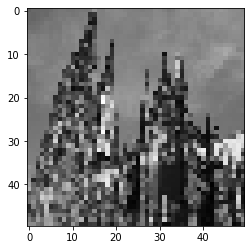

In [ ]:
img_array = df['image'][2]
new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))

plt.imshow(new_array, cmap='gray')
plt.show()

In [ ]:
X = np.array([i[0] for i in train_data]).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
Y = np.array([i[1] for i in train_data])

# test_x = np.array([i[0] for i in test]).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
# test_y = np.array([i[1] for i in test]).reshape(-1)

#Y_coded = pd.get_dummies(Y).values
#test_y_coded = pd.get_dummies(test_y).values

#X = X/255.0
#test_x = test_x/255.0


In [ ]:
from sklearn.preprocessing import LabelBinarizer
encoder = LabelBinarizer()

transfomed_label = encoder.fit_transform(Y)

from keras.utils import to_categorical

Y_coded = to_categorical(transfomed_label)
Y_coded.shape

(452, 2, 2)

In [ ]:
Y_coded.reshape(-1, 1).shape

(1808, 1)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout, Activation, BatchNormalization, MaxPooling2D

In [ ]:
X.shape[1:]

(50, 50, 1)

In [ ]:
model_1 = Sequential()
model_1.add(Conv2D(12, (3,3), input_shape=X.shape[1:]))
model_1.add(Activation('relu'))
model_1.add(MaxPooling2D(pool_size=(2,2)))

model_1.add(Conv2D(12, (3,3), input_shape=X.shape[1:]))
model_1.add(Activation('relu'))
model_1.add(MaxPooling2D(pool_size=(2,2)))

model_1.add(Flatten())
model_1.add(Dense(12))
model_1.add(Dense(2, activation = 'sigmoid'))

In [ ]:
model_1.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_17 (Conv2D)           (None, 48, 48, 12)        120       
_________________________________________________________________
activation_23 (Activation)   (None, 48, 48, 12)        0         
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 24, 24, 12)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 22, 22, 12)        1308      
_________________________________________________________________
activation_24 (Activation)   (None, 22, 22, 12)        0         
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 11, 11, 12)        0         
_________________________________________________________________
flatten_9 (Flatten)          (None, 1452)             

In [ ]:
model_1.compile(
    optimizer='adam',
    loss='binary_crossentropy', 
    metrics=['accuracy']
)

#model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

In [ ]:
model_1_training = model_1.fit(
    X, Y, epochs=30, validation_split=0.2
)

Epoch 1/30
12/12 [==============================] - 0s 18ms/step - loss: 0.0306 - accuracy: 0.9917 - val_loss: 0.8246 - val_accuracy: 0.8242
Epoch 2/30
12/12 [==============================] - 0s 15ms/step - loss: 0.0230 - accuracy: 0.9917 - val_loss: 0.8055 - val_accuracy: 0.8462
Epoch 3/30
12/12 [==============================] - 0s 15ms/step - loss: 0.0210 - accuracy: 0.9945 - val_loss: 0.9666 - val_accuracy: 0.8132
Epoch 4/30
12/12 [==============================] - 0s 16ms/step - loss: 0.0356 - accuracy: 0.9945 - val_loss: 0.7776 - val_accuracy: 0.8681
Epoch 5/30
12/12 [==============================] - 0s 17ms/step - loss: 0.0420 - accuracy: 0.9889 - val_loss: 0.8887 - val_accuracy: 0.8462
Epoch 6/30
12/12 [==============================] - 0s 16ms/step - loss: 0.0247 - accuracy: 0.9917 - val_loss: 0.8286 - val_accuracy: 0.8571
Epoch 7/30
12/12 [==============================] - 0s 15ms/step - loss: 0.0238 - accuracy: 0.9917 - val_loss: 0.9179 - val_accuracy: 0.8242
Epoch 8/30
12